Cluster assignments: [0 1 0 0 1 0 1 0 0 1 0 0]
Final centroids:
 [[2.75  1.125]
 [2.5   3.75 ]]
Within-cluster sum of squares (WCSS): 28.125


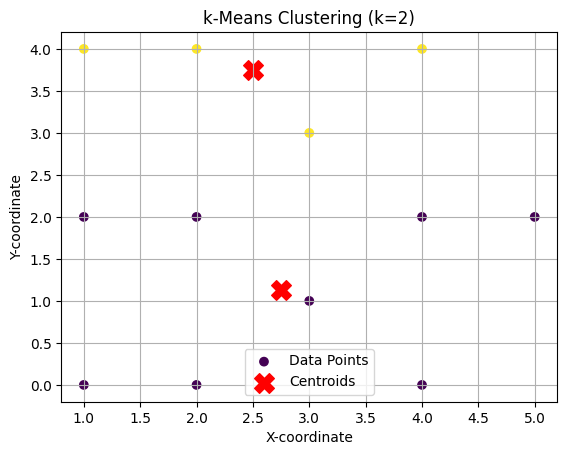

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset with two features (x, y)
data = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [4, 2],
    [4, 4],
    [4, 0],
    [3, 3],
    [3, 1],
    [2, 2],
    [2, 4],
    [2, 0],
    [5, 2]
])

# k-Means Clustering Algorithm
def k_means(data, k, max_iters=100):
    # Randomly initialize centroids
    np.random.seed(42)  # For reproducibility
    initial_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[initial_indices]

    for _ in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        # Step 2: Update centroids
        new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return cluster_assignments, centroids

# Compute WCSS
def compute_wcss(data, cluster_assignments, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[cluster_assignments == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# Run k-Means
k = 2
cluster_assignments, centroids = k_means(data, k)
wcss = compute_wcss(data, cluster_assignments, centroids)

# Output results
print("Cluster assignments:", cluster_assignments)
print("Final centroids:\n", centroids)
print("Within-cluster sum of squares (WCSS):", wcss)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('k-Means Clustering (k=2)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid()
plt.show()
